In [1]:
# This program generates 2 panels of FIG.7 in which
# the firing rates traces and raster plot of the shuffled network are shown

#Also generates 3 supplementary figure where we show the drop in power of the shuffled network compared to the control case

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
#Importing some info I need for this program
runtime=np.loadtxt("general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [4]:
#Folder where the spikes files are stored
a='simulations_data/Cont/Spikes_files_30pA_SHUFFLE'
#a='simulations_data/Cont/Spikes_files_30pA_SHUFFLE_fake'
#a='simulations_data/Cont/Spikes_files_30pA'

In [5]:
#Upload the spikes files
#layer1
S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#layer23
S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#layer4
S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#layer5
S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#layer6
S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000

<ipython-input-5-0e80717f468d>:3: UserWarning: loadtxt: Empty input file: "simulations_data/Cont/Spikes_files_30pA_SHUFFLE/S_vip1i.txt"
  S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
<ipython-input-5-0e80717f468d>:4: UserWarning: loadtxt: Empty input file: "simulations_data/Cont/Spikes_files_30pA_SHUFFLE/S_vip1t.txt"
  S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000


In [6]:
#RASTER PLOT all layers

<ipython-input-7-23f88be11699>:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


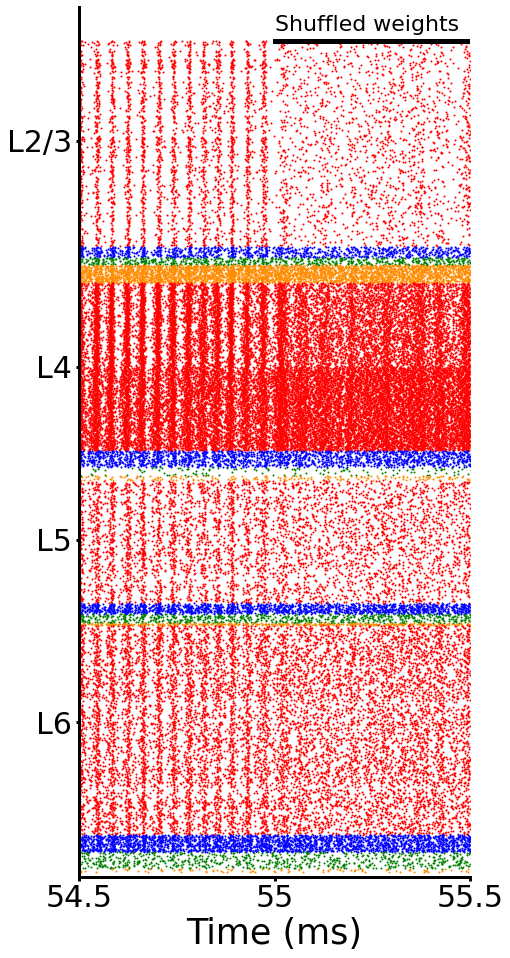

In [7]:
#Time of the simulation I am interested in looking at 
xmin=54.5*1000
xmax=55.5*1000

#Need this for the raster plot
Ntot=5000 #total number of neurons (rows) in the raster plot
N1=int(0.0192574218*Ntot) #Numbers of cells in each layer L1,L2/3,L4,L5
N2_3=int(0.291088453*Ntot)
N4=int(0.237625904*Ntot)
N5=int(0.17425693*Ntot)
N6= Ntot-N2_3-N4-N5

#FROM LAYER 2/3 TOP to LAYER 6 bottom of the plot
#I need the indexes to build the rows
i_e23=S_e23i+ N[0][3]+N[0][2]+N[0][1]
i_pv23=S_pv23i+ N[0][3]+N[0][2]
i_sst23=S_sst23i+ N[0][3]
i_vip23=S_vip23i

i_e4=S_e4i+ N[1][3]+N[1][2]+N[1][1]
i_pv4=S_pv4i+ N[1][3]+N[1][2]
i_sst4=S_sst4i+ N[1][3]
i_vip4=S_vip4i

i_e5=S_e5i+ N[2][3]+N[2][2]+N[2][1]
i_pv5=S_pv5i+ N[2][3]+N[2][2]
i_sst5=S_sst5i+ N[2][3]
i_vip5=S_vip5i

i_e6=S_e6i+ N[3][3]+N[3][2]+N[3][1]
i_pv6=S_pv6i+ N[3][3]+N[3][2]
i_sst6=S_sst6i+ N[3][3]
i_vip6=S_vip6i

#create the figure
f,ax= plt.subplots(figsize=(7,16))

#Layer 2/3
ax.plot(S_e23t,i_e23+N6+N5+N4,'.', markersize=2,color='r', label='E')
ax.plot(S_pv23t,i_pv23+N6+N5+N4,'.', markersize=2,color='b', label='PV')
ax.plot(S_sst23t,i_sst23+N6+N5+N4,'.', markersize=2,color='g', label='SST')
ax.plot(S_vip23t,i_vip23+N6+N5+N4,'.', markersize=2,color='darkorange', label='VIP')
#Layer 4
ax.plot(S_e4t,i_e4+N6+N5,'.', markersize=2,color='r')
ax.plot(S_pv4t,i_pv4+N6+N5,'.', markersize=2,color='b')
ax.plot(S_sst4t,i_sst4+N6+N5,'.', markersize=2,color='g')
ax.plot(S_vip4t,i_vip4+N6+N5,'.', markersize=2,color='darkorange')
#Layer 5
ax.plot(S_e5t,i_e5+N6,'.', markersize=2,color='r')
ax.plot(S_pv5t,i_pv5+N6,'.', markersize=2,color='b')
ax.plot(S_sst5t,i_sst5+N6,'.', markersize=2,color='g')
ax.plot(S_vip5t,i_vip5+N6,'.', markersize=2,color='darkorange')
#Layer 6
ax.plot(S_e6t,i_e6,'.', markersize=2,color='r')
ax.plot(S_pv6t,i_pv6,'.', markersize=2,color='b')
ax.plot(S_sst6t,i_sst6,'.', markersize=2,color='g')
ax.plot(S_vip6t,i_vip6,'.', markersize=2,color='darkorange')

ax.set_xlim(xmin,xmax) #I plot the desired part, defined above
plt.ylim(-30,5205)
#plt.legend(fontsize=19) #If you want to plot the standard legend


#Layout
plt.setp(ax.spines.values(), linewidth=3)
#Remove only 2 edges of the box
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

#Ticks size and lables
plt.xticks(size=30)
plt.locator_params(axis='x', nbins=5) #How many ticks on x axis
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.xlabel('Time (ms)', size=35)
#plt.ylabel('neuron index', size=30)

#Create names of layers on the y-axis
lab = ('L6', 'L5',
               'L4', 'L2/3')
y_pos = [900,2000,3040,4400] #position where to put the labels
plt.yticks(y_pos, lab,size=28)
plt.yticks(size=30)
#If you don't want the label on y axis uncomment this
#ax.get_yaxis().set_visible(False)


#Legend (if you want it uncomment this)
# plt.legend(loc="upper left", markerscale=5., fontsize=23)
# l1= plt.legend(loc='upper center', bbox_to_anchor=(0.55, 1.08),
#           ncol=2, fancybox=True, markerscale=10, shadow=False, fontsize=25)
# l1.get_frame().set_linewidth(3.0)
# l1.get_frame().set_edgecolor('k')

# Add text

plt.text(55000,5060,'Shuffled weights',rotation=360,size=22)
plt.axhline(5001, xmin =0.5, xmax =1,color='k', linewidth=5)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels= ['54.5','55','55.5']
plt.locator_params(axis='x', nbins=2)
ax.set_xticklabels(labels)

plt.show()

In [11]:
#RASTER PLOT layer 2/3 (panel figure 7)

<ipython-input-13-fcf6bed2c493>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labs)


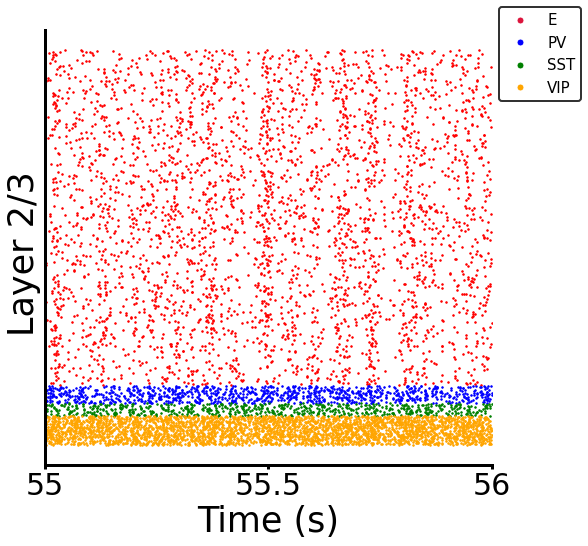

In [13]:
#Time of the simulation I am interested in looking at 
xmin=55*1000
xmax=56*1000

#I need the indexes to build the rows
i_e23=S_e23i+ N[0][3]+N[0][2]+N[0][1]
i_pv23=S_pv23i+ N[0][3]+N[0][2]
i_sst23=S_sst23i+ N[0][3]
i_vip23=S_vip23i

#Create fig
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(S_e23t,i_e23,'.', markersize=3,color='r', label='e')
ax.plot(S_pv23t,i_pv23,'.', markersize=3,color='b', label='pv')
ax.plot(S_sst23t,i_sst23,'.', markersize=3,color='g', label='sst')
ax.plot(S_vip23t,i_vip23,'.', markersize=3,color='orange', label='vip')
ax.set_xlim(xmin,xmax)


#Layout
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)

ax.set_xlabel('Time (s)', size=35)
ax.set_ylabel('Layer 2/3 ',fontsize=35)
plt.xticks(size=30)
ax.xaxis.set_tick_params(width=3)

#x axis labels
labs= ['55','55.5','56']
ax.set_xticklabels(labs)
plt.locator_params(axis='x', nbins=3)

ax.tick_params(top=False,
       bottom=True,
       left=False,
       right=False,
       labelleft=False,
       labelbottom=True)

#legend customized
legend_elements = [
                   Line2D([0], [0], marker='o', color='w', label='E',
                          markerfacecolor='crimson', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='PV',
                          markerfacecolor='blue', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='SST',
                          markerfacecolor='g', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='VIP',
                          markerfacecolor='orange', markersize=7)]
l1=plt.legend(handles=legend_elements,bbox_to_anchor=(1.0, 1.07), loc='upper left',fontsize=15)
l1.get_frame().set_linewidth(2.0)
l1.get_frame().set_edgecolor('k')

#Save fig
plt.savefig('IMAGES/Fig7A3_raster_shuffle_layer23.png', bbox_inches='tight')

#Show fig
plt.show()

In [14]:
#Function for computation of the firing rates from spikes
def rates(data,iniz,fin,window,step_size):
    spikes=0
    time=iniz*1000 #Initial time you want to start computing the rates from (of the total lenght of the simulation time)
    all_time=fin*1000 #Final time you want to finish to compute the rates
    rates=[]
    sort_data=np.sort(data)

    while time <= all_time-window:
        for i in range(0,len(data)):
                if time <sort_data[i]< time+window:
                    spikes+=1
                elif sort_data[i]>= time+window:
                    break
        rates.append(spikes/window)
        time+=step_size
        spikes=0
    return rates  

In [15]:
#I compute the rates I need for the plot
#I already computed it and saved in folder 
#There is no need to run this, but this is how it was cmoputed and then saved
#CALL THE FUNCTION of rates
# iniz=55
# fin=56
# window=200
# step=1
# r_e23_s=rates(S_e23t,iniz,fin,window,step)
# r_e4_s=rates(S_e4t,iniz,fin,window,step)
# r_e5_s=rates(S_e5t,iniz,fin,window,step)
# r_e6_s=rates(S_e6t,iniz,fin,window,step)
#save_folder='shuffle_rate'
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e23', r_e23_s)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e4', r_e4_s)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e5', r_e5_s)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e6', r_e6_s)

In [16]:
#TO UPLOAD THE COMPUTED RATES from files

In [17]:
#Folder containing the info I need  
saved_folder='shuffle_rate'
r_e23=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e23.npy')
r_e4=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e4.npy')
r_e5=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e5.npy')
r_e6=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e6.npy')

In [18]:
#RASTER PLOT layer 2/3 (panel figure 7)

<ipython-input-19-82e421d6d13d>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labs)


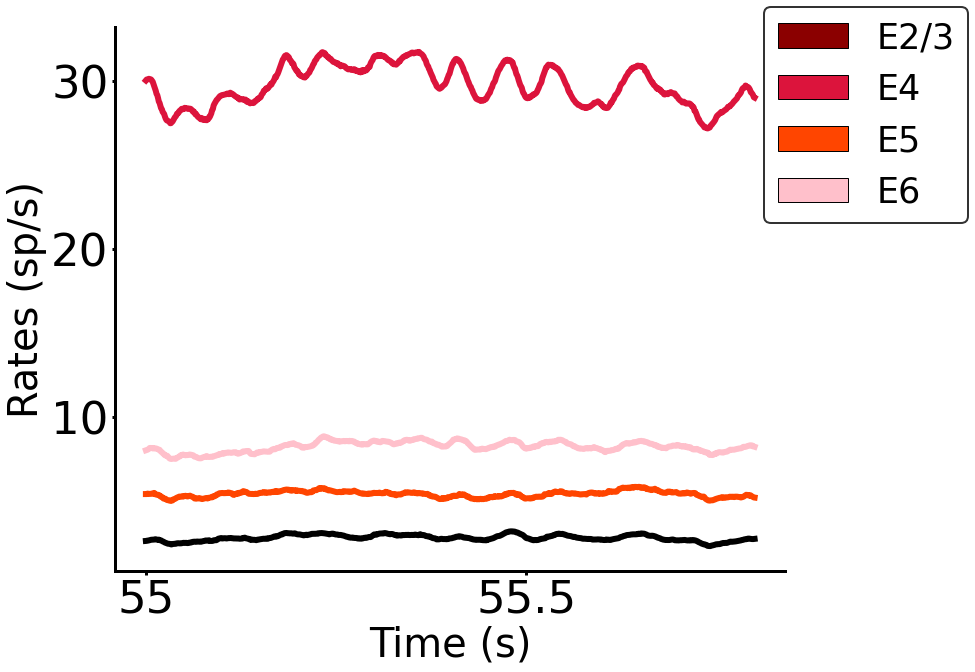

In [19]:
#Create the figure 
fig , ax = plt.subplots(figsize=(12,10))
#plot data 
plt.plot(r_e23*1000/N[0][0],linewidth=6,color='black', label='E2/3')
plt.plot(r_e4*1000/N[1][0],linewidth=6,color='crimson', label='E4')
plt.plot(r_e5*1000/N[2][0],linewidth=6,color='orangered', label='E5')
plt.plot(r_e6*1000/N[3][0],linewidth=6,color='pink', label='E6')

#Layout
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)

ax.tick_params(axis="x", labelsize=45)
ax.tick_params(axis="y", labelsize=45)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
ax.set_ylabel('Rates (sp/s)',size=40)
ax.set_xlabel('Time (s)', size=40)
#plt.legend(loc='lower right',fontsize=15) #If you want standard legend
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=3)
labs= ['0','55','55.5','56']
ax.set_xticklabels(labs)

#Legend customized
legend_elements1 = [
           Patch(facecolor='darkred',alpha=1, edgecolor='k',
                 label='E2/3'),
               Patch(facecolor='crimson',alpha=1, edgecolor='k',
                 label='E4'),
           Patch(facecolor='orangered',alpha=1, edgecolor='k',
                 label='E5'),
            Patch(facecolor='pink',alpha=1, edgecolor='k',
                 label='E6')]
l1=plt.legend(handles=legend_elements1, loc='upper right', bbox_to_anchor=(1.3, 1.07),fontsize=35)
l1.get_frame().set_linewidth(2.0)
l1.get_frame().set_edgecolor('k')



plt.savefig('IMAGES/Fig7A2_rates_shuffle.png', bbox_inches='tight')
plt.show()

In [20]:
#Supplementary figures analysis

In [21]:
#Function to compute the power spectrum
def power_spectrum(LFP,sec):
    data = LFP
    #print(len(data))
    #le ampiezze non sono relative alle freq in hertz ma al numero di oscillazionin complete nel mio intervallo
    #il primo numero dell'array e' l'ampiezza della frequenza che ci sta una volta (onda che fa 1 giro nell'intervallo), 
    #il secondo numero e' l'ampiezza della frequenza che ci sta due volte (l'onda fa il giro completo 2 volte)
    fourier_transform = np.fft.rfft(data)
    abs_fourier_transform = np.abs(fourier_transform)
    power_spectrum = np.square(abs_fourier_transform)
    #print(fourier_transform[0:100])
    #print(len(fourier_transform)) #Circa meta' della lunghezza della mia time series da analizzare
    #print(power_spectrum)
    # x divided by the time in s of my simulation to obtain Hz (sec is given to the function)
    frequency=[x/sec for x in range(0,len(power_spectrum))]

    return frequency, power_spectrum

In [22]:
#I already computed it and saved in folder 
#There is no need to run this, but this is how it was cmoputed and then saved
#I COMPUTE THE ACCURATE FR with small sliding window (I need it for the power spectrum later)
# iniz=55
# fin=56
# window=1
# step=1
# r_e23_shuff=rates(S_e23t,iniz,fin,window,step)
# r_e4_shuff=rates(S_e4t,iniz,fin,window,step)
# r_e5_shuff=rates(S_e5t,iniz,fin,window,step)
# r_e6_shuff=rates(S_e6t,iniz,fin,window,step)

# save_folder='shuffle_rate'
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e23_1_1', r_e23_shuff)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e4_1_1', r_e4_shuff)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e5_1_1', r_e5_shuff)
# np.save('simulations_data/RATE_FILE_SAVED/'+save_folder+'/r_e6_1_1', r_e6_shuff)

In [23]:
#Folder containing the info I need  
saved_folder='shuffle_rate'
r_e23_shu=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e23_1_1.npy')
r_e4_shu=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e4_1_1.npy')
r_e5_shu=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e5_1_1.npy')
r_e6_shu=np.load('simulations_data/RATE_FILE_SAVED/'+saved_folder+'/r_e6_1_1.npy')

In [24]:
#THIS IS THE ONE RESHUFFLED
sec=1
freq_23sh,power_sp_23sh=power_spectrum(r_e23_shu,sec)
freq_4sh,power_sp_4sh=power_spectrum(r_e4_shu,sec)
freq_5sh,power_sp_5sh=power_spectrum(r_e5_shu,sec)
freq_6sh,power_sp_6sh=power_spectrum(r_e6_shu,sec)

In [25]:
#THIS CONTAINS ALL THE INPUTS to L4 after 55s, if I want the control case, which is 30pA is the number [3]
saved_folder='rate_1_1_3sec'
r_e23_all=np.load('simulations_data/RATE_FILE_SAVED/input_e4/'+saved_folder+'/r_e23_all.npy')
r_e4_all=np.load('simulations_data/RATE_FILE_SAVED/input_e4/'+saved_folder+'/r_e4_all.npy')
r_e5_all=np.load('simulations_data/RATE_FILE_SAVED/input_e4/'+saved_folder+'/r_e5_all.npy')
r_e6_all=np.load('simulations_data/RATE_FILE_SAVED/input_e4/'+saved_folder+'/r_e6_all.npy')

sec=3 #second of the simulation analysed
freq_4,power_sp_4=power_spectrum(r_e4_all[3],sec)
freq_23,power_sp_23=power_spectrum(r_e23_all[3],sec)
freq_5,power_sp_5=power_spectrum(r_e5_all[3],sec)
freq_6,power_sp_6=power_spectrum(r_e6_all[3],sec)

In [26]:
#FIND freq where the power is maximum 
def find_freq(power_sp0,freq0):
    max_index = np.argmax(power_sp0[1:], axis=0)
    #print(max_index)
    #print(freq0[max_index+1])
    return freq0[max_index+1]

# #to find the seconf peak
def find_freq_from(power_sp0,freq0,from_where):
    max_index = np.argmax(power_sp0[from_where:], axis=0)
    #print(max_index)
    print(freq0[max_index+from_where])
    return freq0[max_index+from_where]

In [27]:
#I FOUND THE FREQ WHERE THE POWER IS MAX for the control case
max_index_CONTROL = np.argmax(power_sp_23[1:], axis=0)
print(max_index_CONTROL)

f_23=find_freq(power_sp_23,freq_23)
f_4=find_freq(power_sp_4,freq_4)
f_5=find_freq(power_sp_5,freq_5)
f_6=find_freq(power_sp_6,freq_6)

#Frequences with max power
f=[f_23,f_4,f_5,f_6]
print(f)


#Value of max power
m_23=np.max(power_sp_23[1:], axis=0)
m_4=np.max(power_sp_4[1:], axis=0)
m_5=np.max(power_sp_5[1:], axis=0)
m_6=np.max(power_sp_6[1:], axis=0)

print("Value of power of the CONTROL at the maximum of the control")
m=[m_23,m_4,m_5,m_6]
print(m)


#Value of power at 17 Hz
pw23con=power_sp_23[17]
pw4con=power_sp_4[17]
pw5con=power_sp_5[17]
pw6con=power_sp_6[17]
#Value of power at the maximum
print("Value of power of the CONTROL at the maximum of the shuffled")
print(pw23con,pw4con,pw5con,pw6con)

78
[26.333333333333332, 26.333333333333332, 26.333333333333332, 26.333333333333332]
Value of power of the CONTROL at the maximum of the control
[68468508.68576491, 739722923.1324905, 23085683.44877482, 93153815.23599678]
Value of power of the CONTROL at the maximum of the shuffled
10902.070709545587 133291.6844395808 70723.68233347125 10581.900550169335


In [28]:
#For the shuffled case and the different layers
f_23sh=find_freq(power_sp_23sh,freq_23sh)
f_4sh=find_freq(power_sp_4sh,freq_4sh)
f_5sh=find_freq(power_sp_5sh,freq_5sh)
f_6sh=find_freq(power_sp_6sh,freq_6sh)

#Frequences with max power
print('Freq. with max power (of SHUFFLED)')

f_sh=[f_23sh,f_4sh,f_5sh,f_6sh]
print(f_sh)


#Value of max power
m_23sh=np.max(power_sp_23sh[1:], axis=0)
m_4sh=np.max(power_sp_4sh[1:], axis=0)
m_5sh=np.max(power_sp_5sh[1:], axis=0)
m_6sh=np.max(power_sp_6sh[1:], axis=0)

print('Maximum Values of the power (of SHUFFLED)')

m_sh=[m_23sh,m_4sh,m_5sh,m_6sh]
print(m_sh)

#At 17 (instead that 15 I still have very similar value)
test=power_sp_5sh[17]
print(test)
#Values of the power at the frequency where in the control case I had oscillations: 

pw23sh=power_sp_23sh[max_index_CONTROL+1]
pw4sh=power_sp_4sh[max_index_CONTROL+1]
pw5sh=power_sp_5sh[max_index_CONTROL+1]
pw6sh=power_sp_6sh[max_index_CONTROL+1]
print('Values of the power of SHUFFLED at 26 Hz')
print(pw23sh,pw4sh,pw5sh,pw6sh)

Freq. with max power (of SHUFFLED)
[17.0, 17.0, 15.0, 17.0]
Maximum Values of the power (of SHUFFLED)
[151693.45111784642, 5239945.574388814, 37599.652281789284, 390753.70587339194]
37544.752898852516
Values of the power of SHUFFLED at 26 Hz
7724.254727621122 780.2487790719791 724.8416739847066 4711.924675540759


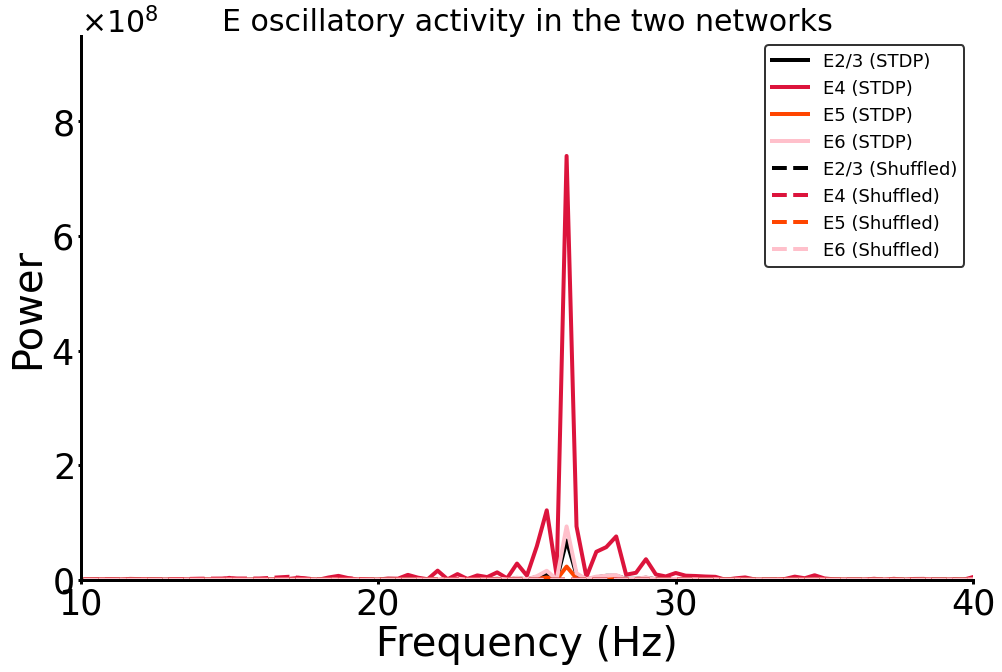

In [29]:
#Create figure
fig3,ax = plt.subplots(figsize=(16,10))
#control data
plt.plot(freq_23,power_sp_23,linewidth=4,color='black',label='E2/3 (STDP)')
plt.plot(freq_4,power_sp_4,linewidth=4,color='crimson',label='E4 (STDP) ')
plt.plot(freq_5,power_sp_5,linewidth=4,color='orangered',label='E5 (STDP)')
plt.plot(freq_6,power_sp_6,linewidth=4,color='pink',label='E6 (STDP)')
#shuffled data
plt.plot(freq_23sh[1:], power_sp_23sh[1:], linestyle='dashed',linewidth=4,color='black',label='E2/3 (Shuffled)')
plt.plot(freq_4sh[1:], power_sp_4sh[1:],linestyle='dashed',linewidth=4,color='crimson',label='E4 (Shuffled)')
plt.plot(freq_5sh[1:], power_sp_5sh[1:],linestyle='dashed',linewidth=4,color='orangered',label='E5 (Shuffled)')
plt.plot(freq_6sh[1:], power_sp_6sh[1:], linestyle='dashed',linewidth=4,color='pink',label='E6 (Shuffled)')


#legend
l1=plt.legend(loc='best',title="", fontsize=18, title_fontsize=25)
l1.get_frame().set_linewidth(2.0)
l1.get_frame().set_edgecolor('k')

#Layout
plt.setp(ax.spines.values(), linewidth=3)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

#ticks and labels
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax.tick_params(axis="x", labelsize=35)
ax.tick_params(axis="y", labelsize=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
 
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useOffset=None, useLocale=None, useMathText=True)
offset_text = ax.yaxis.get_offset_text()
offset_text.set_size(30)  # Adjust the font size as desired

plt.title('E oscillatory activity in the two networks',fontsize=30)
plt.xlabel('Frequency (Hz)',fontsize=40)
plt.ylabel('Power',fontsize=40)
plt.xlim(10,40)
plt.ylim(0,3*10**8.5)

#save fig
plt.savefig('IMAGES/Fig7_SUPP_SHUFFLEDpower.png')
#show fig
plt.show()


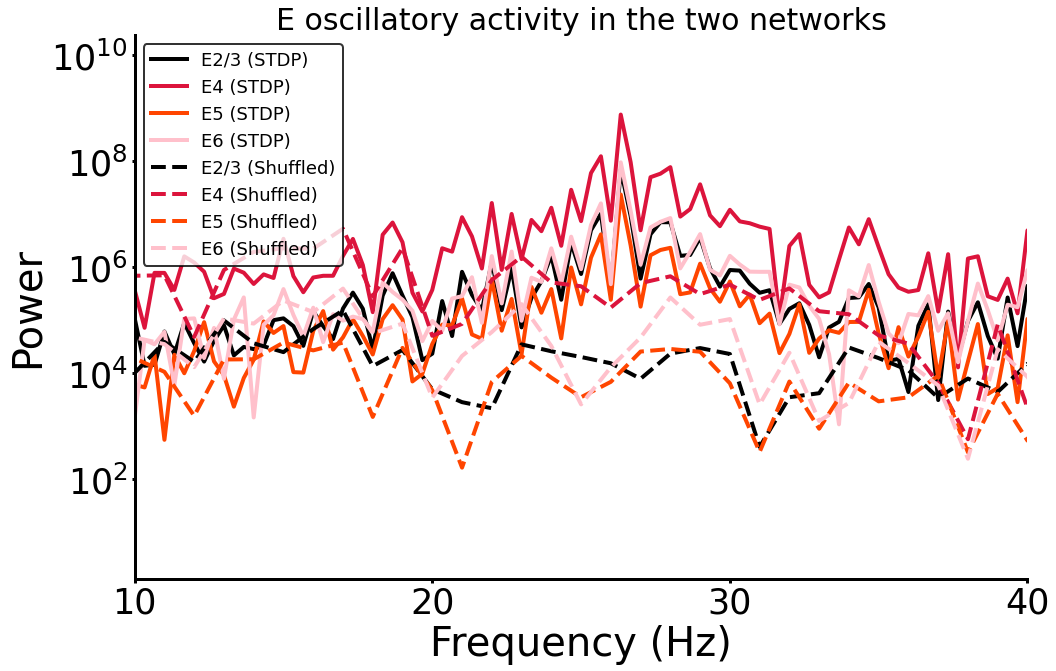

In [30]:
#Create figure
fig3,ax = plt.subplots(figsize=(16,10))
plt.plot(freq_23,power_sp_23,linewidth=4,color='black',label='E2/3 (STDP)')
plt.plot(freq_4,power_sp_4,linewidth=4,color='crimson',label='E4 (STDP) ')
plt.plot(freq_5,power_sp_5,linewidth=4,color='orangered',label='E5 (STDP)')
plt.plot(freq_6,power_sp_6,linewidth=4,color='pink',label='E6 (STDP)')

plt.plot(freq_23sh[1:], power_sp_23sh[1:], linestyle='dashed',linewidth=4,color='black',label='E2/3 (Shuffled)')
plt.plot(freq_4sh[1:], power_sp_4sh[1:],linestyle='dashed',linewidth=4,color='crimson',label='E4 (Shuffled)')
plt.plot(freq_5sh[1:], power_sp_5sh[1:],linestyle='dashed',linewidth=4,color='orangered',label='E5 (Shuffled)')
plt.plot(freq_6sh[1:], power_sp_6sh[1:], linestyle='dashed',linewidth=4,color='pink',label='E6 (Shuffled)')

#legend
l1=plt.legend(loc='best',title="", fontsize=18, title_fontsize=25)
l1.get_frame().set_linewidth(2.0)
l1.get_frame().set_edgecolor('k')

#Layout
plt.setp(ax.spines.values(), linewidth=3)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

#ticks and labels
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax.tick_params(axis="x", labelsize=35)
ax.tick_params(axis="y", labelsize=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

plt.title('E oscillatory activity in the two networks',fontsize=30)
plt.xlabel('Frequency (Hz)',fontsize=40)
plt.ylabel('Power',fontsize=40)
plt.xlim(10,40)
plt.yscale("log")

#Save and show figure
plt.savefig('IMAGES/Fig7_SUPP_SHUFFLEDpower.png')
plt.show()

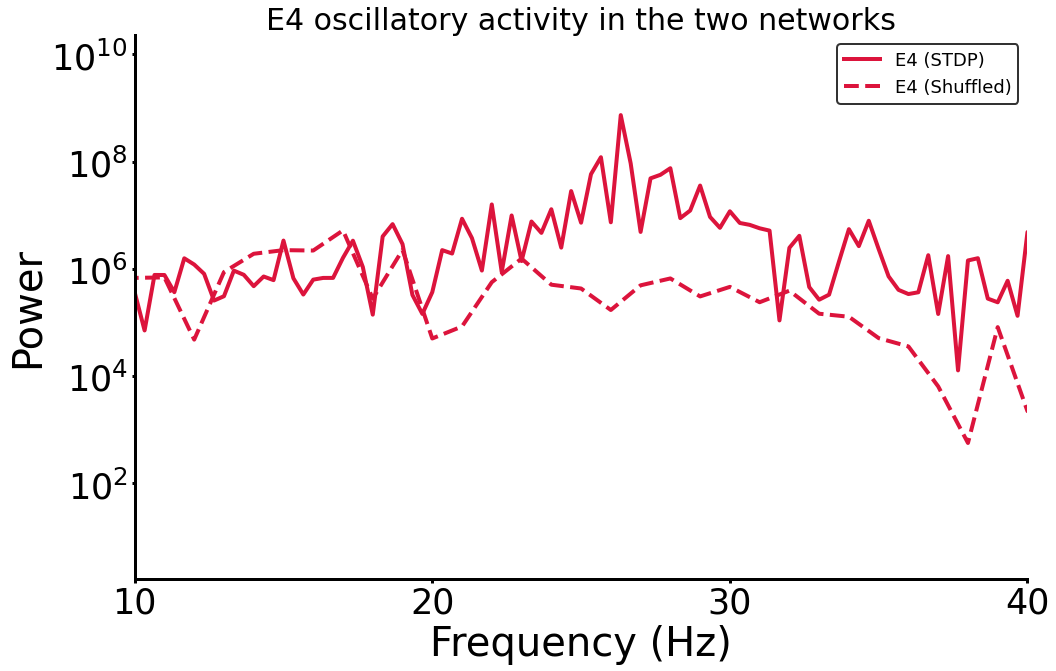

In [31]:
#Create figure
fig3,ax = plt.subplots(figsize=(16,10))
#plt.plot(freq_23,power_sp_23,linewidth=4,color='black',label='E2/3 (STDP)')
plt.plot(freq_4,power_sp_4,linewidth=4,color='crimson',label='E4 (STDP) ')
#plt.plot(freq_5,power_sp_5,linewidth=4,color='orangered',label='E5 (STDP)')
#plt.plot(freq_6,power_sp_6,linewidth=4,color='pink',label='E6 (STDP)')

#plt.plot(freq_23sh[1:], power_sp_23sh[1:], linestyle='dashed',linewidth=4,color='black',label='E2/3 (Shuffled)')
plt.plot(freq_4sh[1:], power_sp_4sh[1:],linestyle='dashed',linewidth=4,color='crimson',label='E4 (Shuffled)')
#plt.plot(freq_5sh[1:], power_sp_5sh[1:],linestyle='dashed',linewidth=4,color='orangered',label='E5 (Shuffled)')
#plt.plot(freq_6sh[1:], power_sp_6sh[1:], linestyle='dashed',linewidth=4,color='pink',label='E6 (Shuffled)')

#legend
l1=plt.legend(loc='best',title="", fontsize=18, title_fontsize=25)
l1.get_frame().set_linewidth(2.0)
l1.get_frame().set_edgecolor('k')

#Layout
plt.setp(ax.spines.values(), linewidth=3)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

#ticks and labels
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax.tick_params(axis="x", labelsize=35)
ax.tick_params(axis="y", labelsize=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

plt.title('E4 oscillatory activity in the two networks',fontsize=30)
plt.xlabel('Frequency (Hz)',fontsize=40)
plt.ylabel('Power',fontsize=40)
plt.xlim(10,40)
plt.yscale("log")
 
plt.savefig('IMAGES/Fig7_SUPP_SHUFFLEDpowerLOG.png')
plt.show()


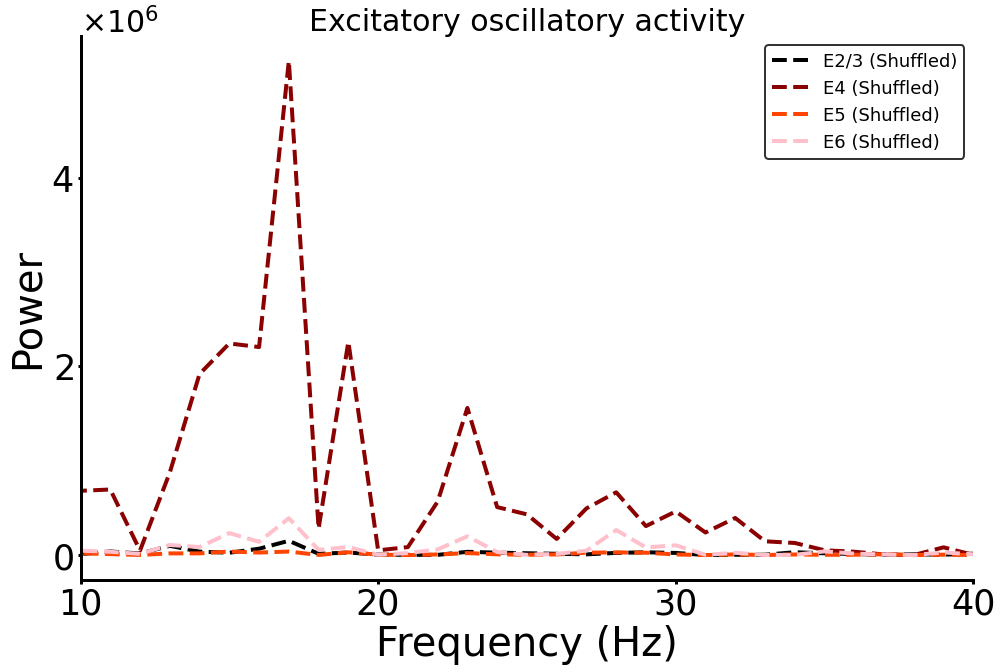

In [32]:
#Create figure
fig3,ax = plt.subplots(figsize=(16,10))
#plt.plot(freq_23,power_sp_23,linewidth=4,color='black',label='E2/3 (STDP)')
#plt.plot(freq_4,power_sp_4,linewidth=4,color='r',alpha=0.6,label='E4 (STDP)')
#plt.plot(freq_5,power_sp_5,linewidth=4,color='orangered',label=' E5 (STDP)')
#plt.plot(freq_6,power_sp_6,linewidth=4,color='pink',label='E6 (STDP) ')

plt.plot(freq_23sh[1:], power_sp_23sh[1:], linestyle='dashed',linewidth=4,color='black',label='E2/3 (Shuffled)')
plt.plot(freq_4sh[1:], power_sp_4sh[1:],linestyle='dashed',linewidth=4,color='darkred',label='E4 (Shuffled)')
plt.plot(freq_5sh[1:], power_sp_5sh[1:],linestyle='dashed',linewidth=4,color='orangered',label='E5 (Shuffled)')
plt.plot(freq_6sh[1:], power_sp_6sh[1:], linestyle='dashed',linewidth=4,color='pink',label='E6 (Shuffled)')


#legend
l1=plt.legend(loc='best',title="", fontsize=18, title_fontsize=25)
l1.get_frame().set_linewidth(2.0)
l1.get_frame().set_edgecolor('k')

#Layout
plt.setp(ax.spines.values(), linewidth=3)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

#ticks and labels
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
ax.tick_params(axis="x", labelsize=35)
ax.tick_params(axis="y", labelsize=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

plt.title('Excitatory oscillatory activity',fontsize=30)
plt.xlabel('Frequency (Hz)',fontsize=40)
plt.ylabel('Power',fontsize=40)
plt.xlim(10,40)

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useOffset=None, useLocale=None, useMathText=True)
offset_text = ax.yaxis.get_offset_text()
offset_text.set_size(30)  # Adjust the font size as desired

#Save and show fig
plt.savefig('IMAGES/Fig7_SUPP_SHUFFLEDpowerZoom_onlySHUFF.png')
plt.show()